## Tutorial 2: Linear filters


In this tutorial, we will recall the concepts:

1. The dual nature of images as matrix representation and topographic maps

2. Visualization and gray level rescaling

3. Photometric & spatial image resolution

4. Histogram - what is it about and how to apply it. In which library to find it.

5. Convolution - masks, application

6. Image noise - kind, parameters

7. Gaussian filtering: kernels with different sigma

8. Mean vs median image filtering


(187, 269, 3) uint8 255 0


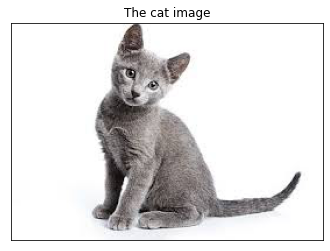

In [187]:
from skimage import io
from matplotlib import pyplot as plt

#Read the image graycat.jpeg
catRGB=io.imread('images/graycat.jpeg')
#check its dimensions, max and min pixel value and type
print(catRGB.shape, catRGB.dtype, catRGB.max(), catRGB.min())

#Visualize it
plt.imshow(catRGB)
plt.title('The cat image')
plt.xticks([])
plt.yticks([])
plt.show()

If not gray, convert it to gray level image

What is the command to convert rgb to gray and where is it?

Did it change its type?
Did it change its range?

Type:  float64  min:  0.0008333333333333333  max:  1.0


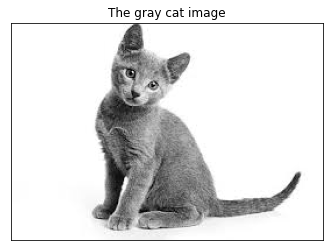

In [188]:
from skimage.color import rgb2gray

cat=rgb2gray(catRGB)

#Visualize it
plt.imshow(cat, cmap='gray')
plt.title('The gray cat image')
plt.xticks([])
plt.yticks([])

print('Type: ', cat.dtype, ' min: ', cat.min(), ' max: ', cat.max())

We need to process the image so better cast it to float, but we don't need 64 bits per pixel. So let's cast it to float16.

How many ways there are to cast an image to float?

In [189]:
from skimage import img_as_float

print(cat.shape, cat.dtype, cat.max(), cat.min())

#cast it to foat16
cat.astype('float16') #Does it change the variable?
print(cat.shape, cat.dtype, cat.max(), cat.min())
catf=cat.astype('float16')
print(catf.shape, catf.dtype, catf.max(), catf.min())
#Explain it

(187, 269) float64 1.0 0.0008333333333333333
(187, 269) float64 1.0 0.0008333333333333333
(187, 269) float16 1.0 0.0008335


In [190]:
catfl=img_as_float(cat) #II version
print(catfl.shape, catfl.dtype, catfl.min(), catfl.max())

(187, 269) float64 0.0008333333333333333 1.0


Let's visualize a line of the image as topographic function

Cat2 1.0 0.0 float64


([], [])

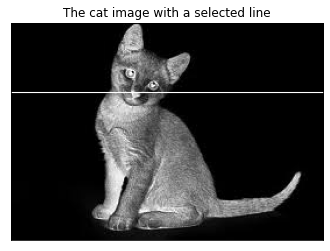

In [191]:
cat2=cat.copy() 
cat2[60,:]=0
cat3=255.0*cat2
print("Cat2", cat2.max(), cat2.min(), cat2.dtype) 

#visualize it
plt.imshow(1-cat2, cmap='gray')
plt.title('The cat image with a selected line')
plt.xticks([])
plt.yticks([])


Get a line and visualize it as a function.

Explain which parts of the graphics to which parts of the image correspond to

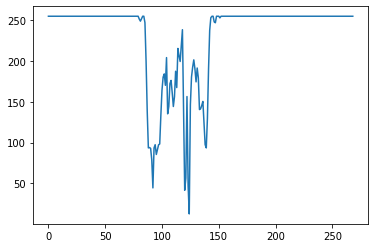

In [192]:
cat4=cat3[51]

#visualize it
plt.plot(cat4)

In [198]:
#what is this line doing?
%matplotlib nbagg 

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

catinv = 255-cat #what is this line doing?

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:catinv.shape[0], 0:catinv.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, catinv ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)

# show it
plt.show()

<IPython.core.display.Javascript object>

# Image quality

Let's return back the image to integer

(187, 269) float64 1.0 0.0008333333333333333
(187, 269) uint8 255 0


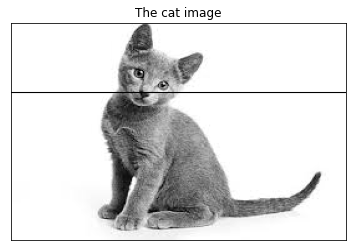

In [199]:
%matplotlib inline

from skimage.transform import rescale
print(cat.shape, cat.dtype, cat.max(), cat.min())

cati=255.0*cat
catint=cati.astype('uint8')
print(catint.shape, catint.dtype, catint.max(), catint.min())

#visualize it
plt.imshow(cat2, cmap='gray', aspect='auto')
plt.title('The cat image')
plt.xticks([])
plt.yticks([])

plt.show()

## Spatial resolution

* Given the cat image, augment twice its spatial resolution

### Rescale, resize, and downscale
Rescale operation resizes an image by a given scaling factor. The scaling factor can either be a single floating point value, or multiple values - one along each axis.

Resize serves the same purpose, but allows to specify an output image shape instead of a scaling factor.

Note that when down-sampling an image, resize and rescale should perform Gaussian smoothing to avoid aliasing artifacts. See the anti_aliasing and anti_aliasing_sigma arguments to these functions.

Downscale serves the purpose of down-sampling an n-dimensional image by integer factors using the local mean on the elements of each block of the size factors given as a parameter to the function.

* Given the cat image, augment twice and reduce triple its spatial resolution

catint:  (187, 269) cat2:  (374, 538)
Original cat shape (187, 269) dtype:  uint8 max:  255
Double cat shape (374, 538) dtype:  float64 max:  1.0
Triple cat shape (56, 81) dtype:  float64 max:  0.996078431372549


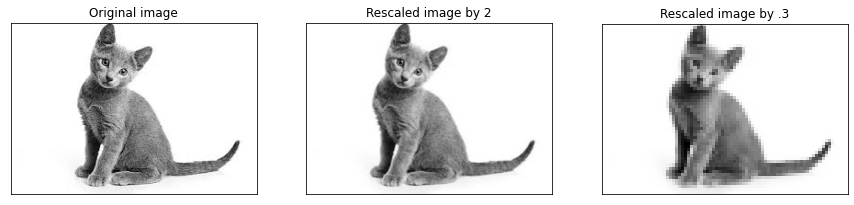

In [200]:
cat2=rescale(catint,2)
print('catint: ', catint.shape, 'cat2: ', cat2.shape)
cat3=rescale(catint,.3)

#Visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(cat2, cmap='gray')
plt.title('Rescaled image by 2')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(cat3, cmap='gray')
plt.title('Rescaled image by .3')
plt.xticks([])
plt.yticks([])


print("Original cat shape", catint.shape, 'dtype: ', catint.dtype, 'max: ', catint.max())
print("Double cat shape", cat2.shape, 'dtype: ', cat2.dtype, 'max: ', cat2.max())
print("Triple cat shape", cat3.shape, 'dtype: ', cat3.dtype, 'max: ', cat3.max())
#Explain it

## Photometric resolution

Photometric resolution depends on the number of grey levels used.

Check the maximum and minimum value.

In [201]:
print("Max: ", catint.max(), " Min: ", catint.min())

Max:  255  Min:  0


Reduce the resolution 10 and 25 times

float64
float64
Cat10: Max:  25  Min:  0
Cat25: Max:  10  Min:  0


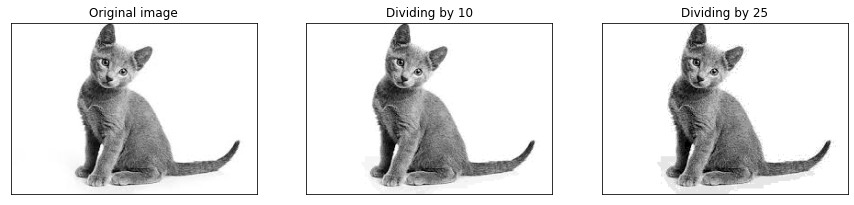

In [202]:
cat10=catint/10
print (cat10.dtype) #Comment what occurred
cat10= cat10.astype("uint8")
cat25=catint/25
print (cat25.dtype)
cat25= cat25.astype("uint8")

#visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(cat10, cmap='gray')
plt.title('Dividing by 10')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(cat25, cmap='gray')
plt.title('Dividing by 25')
plt.xticks([])
plt.yticks([])

print("Cat10: Max: ", cat10.max(), " Min: ", cat10.min())
print("Cat25: Max: ", cat25.max(), " Min: ", cat25.min())

In [203]:
#Check how many different values there are in each image
print(np.unique(catint).shape)
print(np.unique(cat10).shape)
print(np.unique(cat25).shape)

(254,)
(26,)
(11,)


([], [])

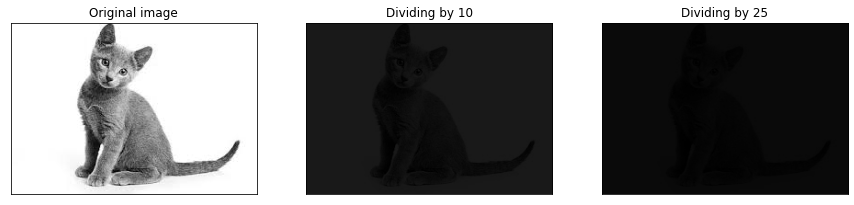

In [204]:
#What is the difference of this visualization with the one before?

fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(catint, cmap='gray', vmin=0, vmax=255)
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(cat25, cmap='gray', vmin=0, vmax=255)
plt.title('Dividing by 25')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(cat10, cmap='gray', vmin=0, vmax=255)
plt.title('Dividing by 10')
plt.xticks([])
plt.yticks([])

## Histogram
What is it about?


*skimage.exposure.histogram(image, nbins=256, source_range='image', normalize=False)[source]*

Returns the histogram of an image.

This function returns the centers of bins and does not rebin integer arrays. For integer arrays, each integer value has its own bin, which improves speed and intensity-resolution.

The histogram is computed on the flattened image: 

**Note that for color images, the function should be used separately on each channel to obtain a histogram for each color channel.**

In [205]:
print(cat25.max())

10


In [206]:
from skimage import exposure
from skimage import img_as_float

hst=exposure.histogram(catint)
hst10=exposure.histogram(cat10)
hst25=exposure.histogram(cat25)
hst25inv=exposure.histogram(255-cat25) #What is it?

# hst[0]: The values of the histogram.
# hst[1]: The values at the center of the bins.
print(hst[0], hst[1])

[   20     6     1     5     4     0     7     2     0     2     2     5
     4     4     7     9    19    14    11    14     9    15    15    10
    12    30    16    16    24    19    17    18    28    17    14    23
    30    25    21    26    26    26    28    31    36    34    27    29
    30    32    33    35    32    27    39    43    35    45    36    43
    40    47    36    50    42    60    50    51    48    57    67    44
    58    55    56    69    64    49    60    65    67    50    80    56
    54    63    79    75    71    67    77    68    80    76    84    91
    86   106    86   111    88    95   111    84   102    93    79   112
   103    91   103   101    99   109    94   124   110    95   108   118
   130   143   123   128   122   137   110   121   109   127   115   118
   128   111   100   112   133   119   116    94   107   117   109   106
   110   120    98   112    89   121   117   103   109   116    89   104
    88    90   102    88   107   103    68    92   

<BarContainer object of 11 artists>

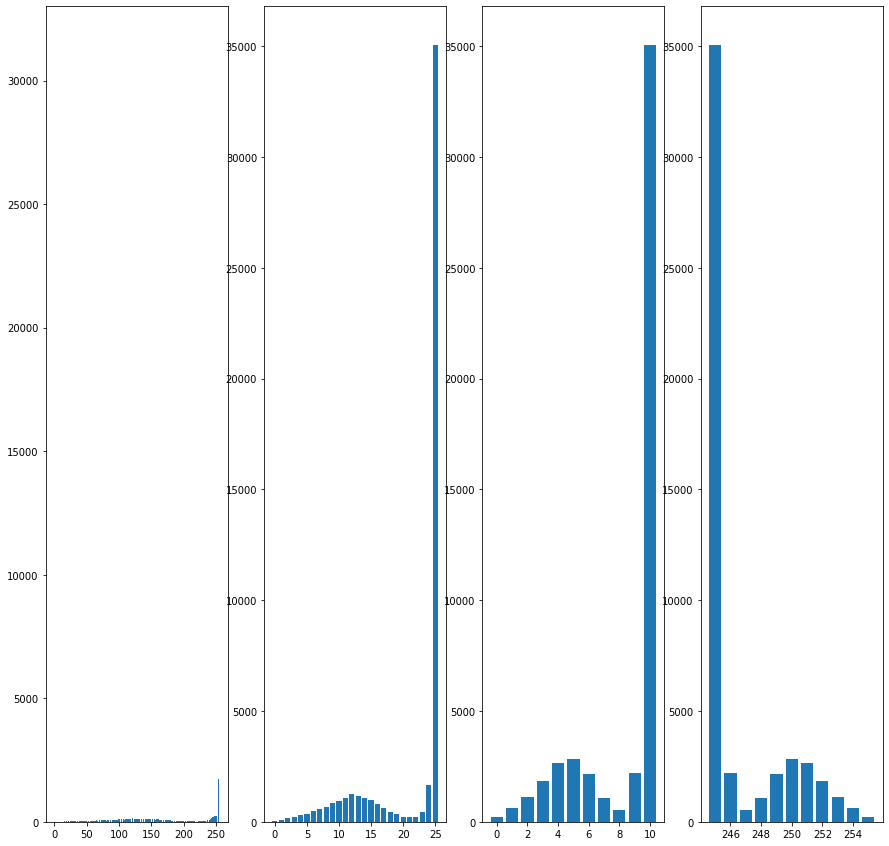

In [207]:
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,4,1)
plt.bar(hst[1],hst[0])
fig.add_subplot(1,4,2)
plt.bar(hst10[1],hst10[0])
fig.add_subplot(1,4,3)
plt.bar(hst25[1],hst25[0])
fig.add_subplot(1,4,4)
plt.bar(hst25inv[1],hst25inv[0])


In [208]:
print(cat.dtype)
print(catint.dtype)
print(cat10.dtype)
print(cat25.dtype)

float64
uint8
uint8
uint8


**Note: In order to apply properly the histogram function, it is recommended to transform the image to float**

### What are the bins in a histogram?

<BarContainer object of 4 artists>

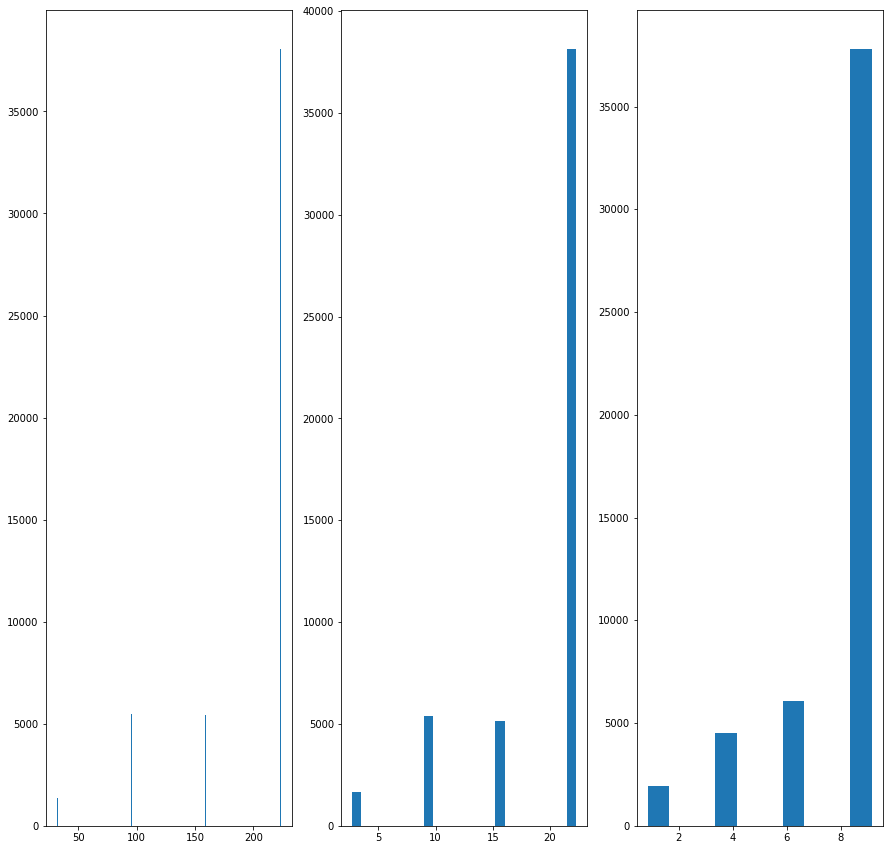

In [209]:
from skimage import exposure
from skimage import img_as_float

hst=exposure.histogram(catint.astype("float16"), nbins=4)
hst10=exposure.histogram(cat10.astype("float16"), nbins=4)
hst25=exposure.histogram(cat25.astype("float16"), nbins=4)

#visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.bar(hst[1],hst[0])
fig.add_subplot(1,3,2)
plt.bar(hst10[1],hst10[0])
fig.add_subplot(1,3,3)
plt.bar(hst25[1],hst25[0])


In [210]:
print(hst[0], hst[1])
print(hst25[0], hst25[1])

[ 1361  5455  5442 38045] [ 31.88  95.6  159.4  223.1 ]
[ 1949  4499  6064 37791] [1.25 3.75 6.25 8.75]


In [211]:
#what is the difference between histogram in skimage.exposure and numpy?
hst=exposure.histogram(cat.astype('float'), nbins=4)
hstnp=np.histogram(cat.astype('float'), bins=4)

print(hst[0],hst[1])
print(hstnp[0],hstnp[1])


[ 1355  5435  5440 38073] [0.12572917 0.37552083 0.6253125  0.87510417]
[ 1355  5435  5440 38073] [8.33333333e-04 2.50625000e-01 5.00416667e-01 7.50208333e-01
 1.00000000e+00]


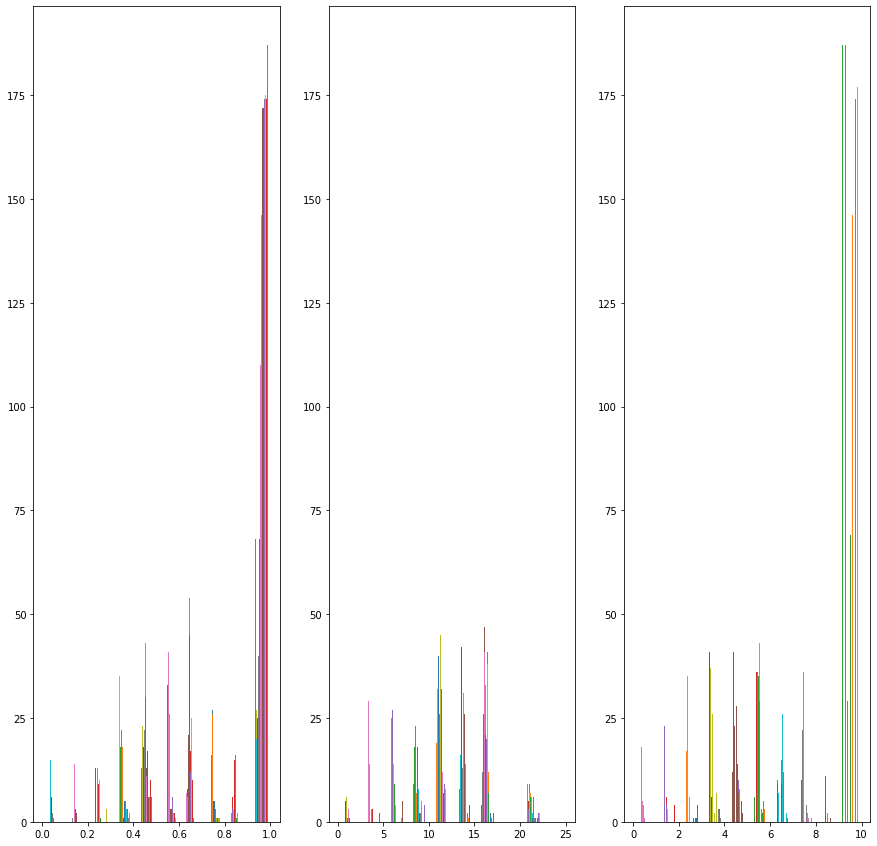

In [212]:
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.hist(cat.astype('float16'))
fig.add_subplot(1,3,2)
plt.hist(cat10.astype('float16'))
fig.add_subplot(1,3,3)
plt.hist(cat25.astype('float16'))
plt.show()

#Check the sintaxis of plt.hist()

## Convolution

Let's smooth an image. For this purpose, use a convolution. 
What is a convolution?

Each value in result is C_i = \sum_j{I_{i+j-k} W_j}, where W is the weights kernel, j is the n-D spatial index over W, I is the input and k is the coordinate of the center of W, specified by origin in the input parameters.


Multi-dimensional convolution:
*skimage.filter.edges.convolve(input, weights, output=None, mode='reflect')*

What mask can we define?

The simplest case to understand is mode='constant', cval=0.0, because in this case borders (i.e. where the weights kernel, centered on any one value, extends beyond an edge of input.


[[0.2 0.2 0.2 0.2 0.2]]


([], [])

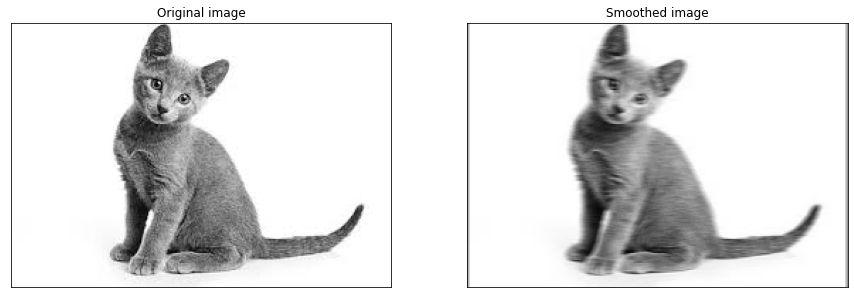

In [214]:
from scipy import ndimage
mask=np.array([[1,1,1,1,1]])
mask=mask/np.sum(mask) #Why?
print(mask)

cat_smooth=ndimage.convolve(catint, mask, mode='constant', cval=0.0)

#visualize
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(cat_smooth, cmap='gray')
plt.title('Smoothed image')
plt.xticks([])
plt.yticks([])


What would happen if we don't normalize the mask?

[[1 1 1 1 1]]


([], [])

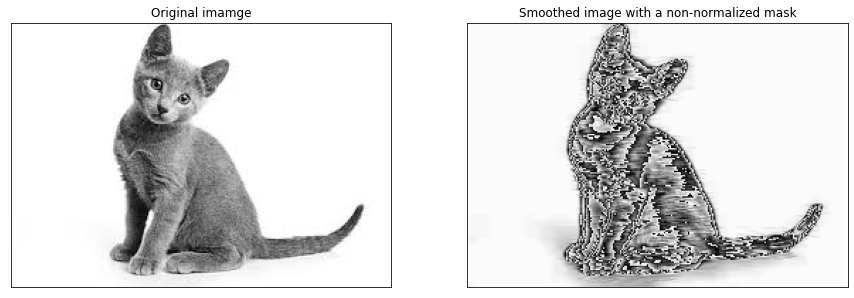

In [223]:
mask=np.array([[1,1,1,1,1]])
print(mask)

cat_smooth_no_norm=ndimage.convolve(catint, mask, mode='constant', cval=0.0)

#visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(cat, cmap='gray')
plt.title('Original imamge')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(cat_smooth_no_norm, cmap='gray')
plt.title('Smoothed image with a non-normalized mask')
plt.xticks([])
plt.yticks([])

Can we use a bigger mask?
What would be the difference?

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


([], [])

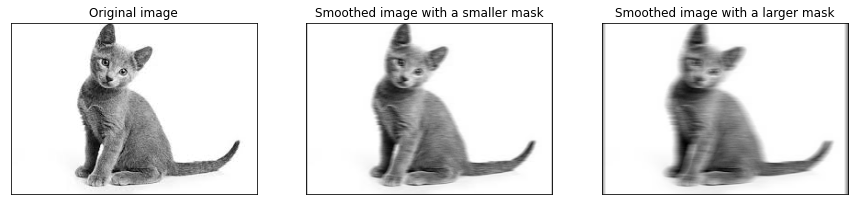

In [224]:
mask=np.array([[1,1,1,1,1,1,1,1,1,1]])
mask=mask/np.sum(mask)
print(mask)

cat_smoother=ndimage.convolve(catint, mask, mode='constant', cval=0.0)

#Visualize 
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(cat_smooth, cmap='gray')
plt.title('Smoothed image with a smaller mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(cat_smoother, cmap='gray')
plt.title('Smoothed image with a larger mask')
plt.xticks([])
plt.yticks([])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


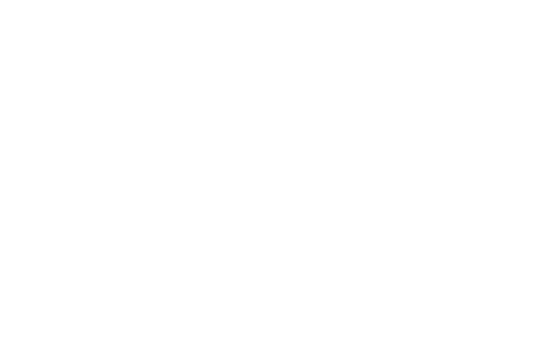

<IPython.core.display.Javascript object>


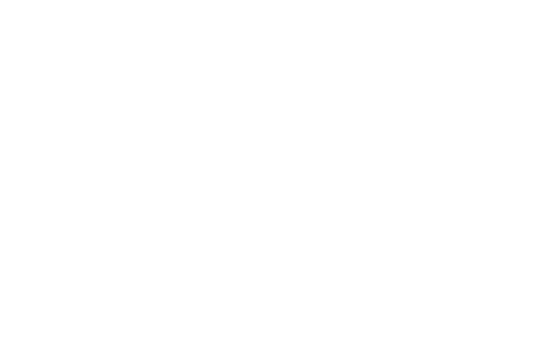

In [225]:
%matplotlib nbagg 

# generate some sample data
catinv = 255-catint
cat_smooth_inv=255-cat_smooth
cat_smoother_inv=255-cat_smoother

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:catinv.shape[0], 0:catinv.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, catinv ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, cat_smooth_inv ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, cat_smoother_inv ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.show()

[[0.03846154 0.15384615 0.61538462 0.15384615 0.03846154]]


([], [])

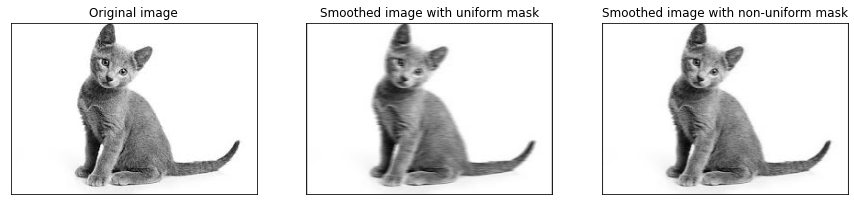

In [226]:
#Use non-uniform mask

%matplotlib inline

mask_non_uniform=np.array([[1,4,16,4,1]])
mask_non_uniform=mask_non_uniform/np.sum(mask_non_uniform)

print(mask_non_uniform)

cat_smooth_nonuniform=ndimage.convolve(catint, mask_non_uniform, mode='constant', cval=0.0)

#visualize
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(cat_smooth, cmap='gray')
plt.title('Smoothed image with uniform mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(cat_smooth_nonuniform, cmap='gray')
plt.title('Smoothed image with non-uniform mask')
plt.xticks([])
plt.yticks([])



In [227]:
#Check on a line the effect of different masks

cat_line=catint[101]
cat_smooth_line=cat_smooth[101]
cat_nonuniform_line=cat_smooth_nonuniform[101]

print(cat_nonuniform_line-cat_smooth_line)



[ 52  41   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
   0 253   3  15  19 254 239 248 234 249  20  11 253 247 246 255  16   7
 244   1  11 251 250   8 253 236  17 250 224  11  24   0 244  10  15 255
 245 242   1   7 255 250 255   5   4   4   1 251   3   1 252   6   2   0
 252   0 253 253   1   4   5 253 250 255   0 251 253   5   7   0   0   1
 249 252   2   3   1   0   3   3 251 252   0   1 246 242   6  13   6   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

## Noise

What kind of image noise do you know?



([], [])

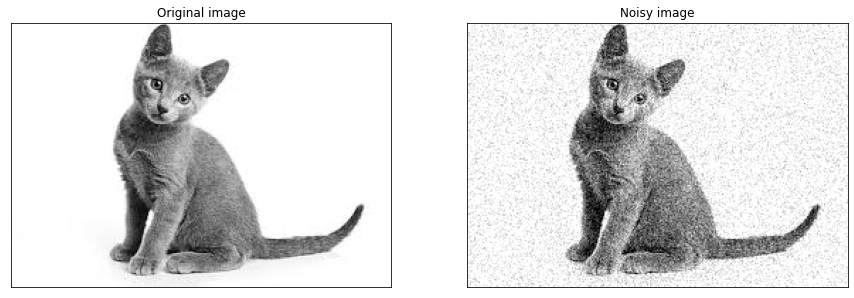

In [229]:
from skimage import util

cat_noisy=util.random_noise(catint, mean=0, var=0.01) #Generates Gaussian noise

#Visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(cat_noisy, cmap='gray')
plt.title('Noisy image')
plt.xticks([])
plt.yticks([])


In [230]:
print(mask)
print(mask_non_uniform)

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[[0.03846154 0.15384615 0.61538462 0.15384615 0.03846154]]


Smooth the noisy image

([], [])

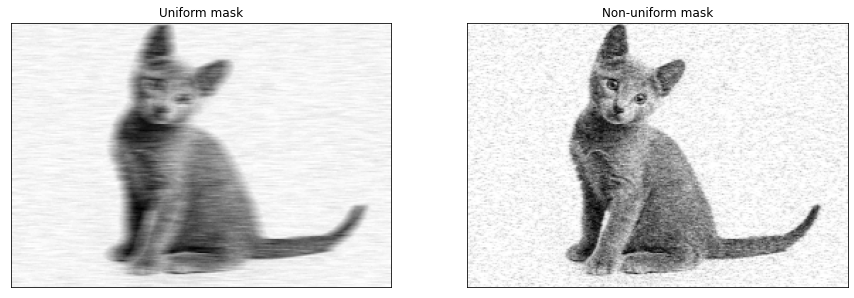

In [231]:
cat_noisy_smooth=ndimage.convolve(cat_noisy, mask)
cat_noisy_smooth_nonuniform=ndimage.convolve(cat_noisy, mask_non_uniform)

#visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(cat_noisy_smooth, cmap='gray')
plt.title('Uniform mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(cat_noisy_smooth_nonuniform, cmap='gray')
plt.title('Non-uniform mask')
plt.xticks([])
plt.yticks([])


## What is the Gaussian filter? Why is it interesting?

The multi-dimensional Gaussian filter function is:

skimage.filters.gaussian(image, sigma=1, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)[source]


This function is a wrapper around scipy.ndi.gaussian_filter().

Integer arrays are converted to float.

The output should be floating point data type since gaussian converts to float provided image. If output is not provided, another array will be allocated and returned as the result.

The multi-dimensional filter is implemented as a sequence of one-dimensional convolution filters. The intermediate arrays are stored in the same data type as the output. Therefore, for output types with a limited precision, the results may be imprecise because intermediate results may be stored with insufficient precision.

([], [])

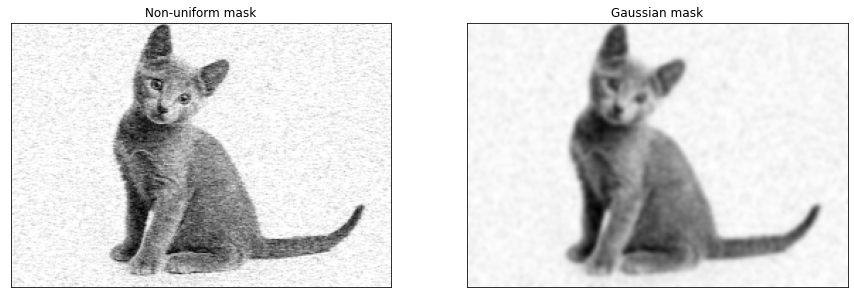

In [232]:
from skimage import filters

cat_noisy_gaussian=filters.gaussian(cat_noisy, sigma=1.5)

#visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(cat_noisy_smooth_nonuniform, cmap='gray')
plt.title('Non-uniform mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(cat_noisy_gaussian, cmap='gray')
plt.title('Gaussian mask')
plt.xticks([])
plt.yticks([])




Check the effect of different sigma parameters?

([], [])

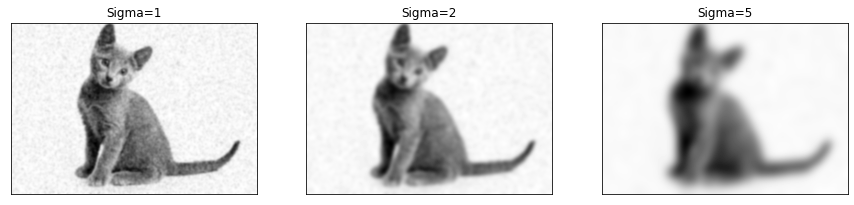

In [233]:
cat_noisy_gaussian1=filters.gaussian(cat_noisy, sigma=1)
cat_noisy_gaussian2=filters.gaussian(cat_noisy, sigma=2)
cat_noisy_gaussian5=filters.gaussian(cat_noisy, sigma=5)


fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(cat_noisy_gaussian1, cmap='gray')
plt.title('Sigma=1')
plt.xticks([])
plt.yticks([])
fig.add_subplot(1,3,2)
plt.imshow(cat_noisy_gaussian2, cmap='gray')
plt.title('Sigma=2')
plt.xticks([])
plt.yticks([])
fig.add_subplot(1,3,3)
plt.imshow(cat_noisy_gaussian5, cmap='gray')
plt.title('Sigma=5')
plt.xticks([])
plt.yticks([])


## What is the median filer?

Text(0.5, 1.0, 'Median filtering')

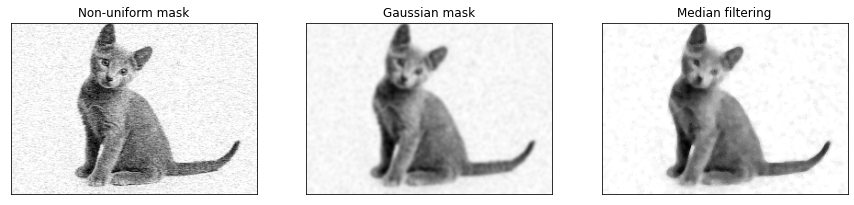

In [234]:
from skimage.filters import median
from skimage.morphology import disk

cat_noisy_median=median(cat_noisy, disk(3))

#visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(cat_noisy_smooth_nonuniform, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Non-uniform mask')
fig.add_subplot(1,3,2)
plt.imshow(cat_noisy_gaussian, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Gaussian mask')
fig.add_subplot(1,3,3)
plt.imshow(cat_noisy_median, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Median filtering')


How is the median and mean filter affecting the **salt&paper** noisy images?

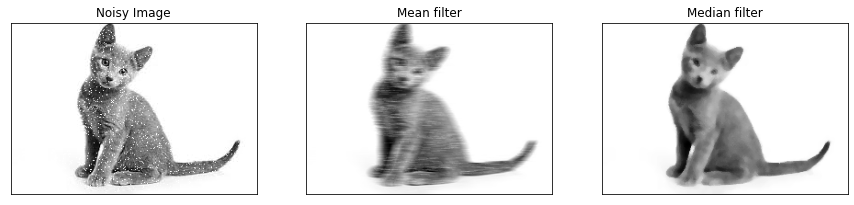

In [235]:
from skimage.filters import median
from skimage.morphology import disk

#introducing impulse noise
cat_noisy_sp=util.random_noise(cat,mode='salt')

cat_noisy_mean=ndimage.convolve(cat_noisy_sp, mask)
cat_noisy_median=median(cat_noisy_sp, disk(3))


fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))

for ax, img, title in zip(
        axes,
        [cat_noisy_sp, cat_noisy_mean, cat_noisy_median],
        ['Noisy Image', 'Mean filter', 'Median filter']
):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

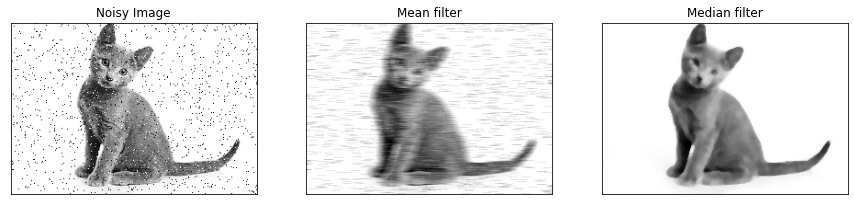

In [236]:
from skimage.filters import median
from skimage.morphology import disk

#introducing salt and paper noise
cat_noisy_sp=util.random_noise(cat,mode='s&p')

cat_noisy_mean=ndimage.convolve(cat_noisy_sp, mask)
cat_noisy_median=median(cat_noisy_sp, disk(3))

#visualize it
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))

for ax, img, title in zip(
        axes,
        [cat_noisy_sp, cat_noisy_mean, cat_noisy_median],
        ['Noisy Image', 'Mean filter', 'Median filter']
):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

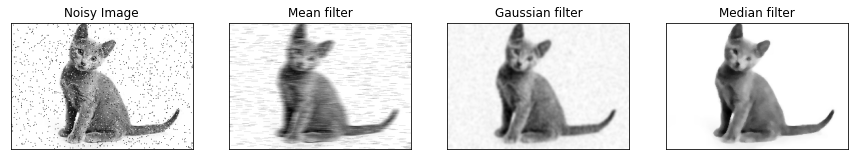

In [237]:
#Comparing mean, Gaussian and median filters

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15, 5))

for ax, img, title in zip(
        axes,
        [cat_noisy_sp, cat_noisy_mean, cat_noisy_gaussian, cat_noisy_median],
        ['Noisy Image', 'Mean filter', 'Gaussian filter', 'Median filter']
):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

**Exercise:** Apply the same operations on color images